In [ ]:
from astropy.io import ascii

In [129]:
#main
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import ascii

def readData(infile):
    infile = 'lens1lightcurve.dat'
    hdat1 = ascii.read(infile)
    return hdat1
    ffamean= np.mean(hdat1['ffa'])
    print (ffamean)
def seedata(data):
    na= data ['ffa']/np.mean(data['ffa'])
    nb= data ['ffb']/np.mean(data['ffb'])
    nc= data ['ffc']/np.mean(data['ffc'])
    nd= data ['ffd']/np.mean(data['ffd'])
    naerr= data ['fferra']/np.mean(data['ffa'])
    nberr= data ['fferrb']/np.mean(data['ffb'])
    ncerr= data ['fferrc']/np.mean(data['ffc'])
    nderr= data ['fferrd']/np.mean(data['ffd'])
    plt.errorbar(data ['day'], na, yerr= naerr, fmt='bo')
    plt.errorbar(data ['day'], nb, yerr= nberr, fmt='mo')
    plt.errorbar(data ['day'], nc, yerr= ncerr, fmt='yo')
    plt.errorbar(data ['day'], nd, yerr= nderr, fmt='go')
    plt.xlabel('day')
    plt.ylabel('flux')
def processdata(data,length):
    na= data ['ffa']/np.mean(data['ffa'])
    nb= data ['ffb']/np.mean(data['ffb'])
    nc= data ['ffc']/np.mean(data['ffc'])
    nd= data ['ffd']/np.mean(data['ffd'])
    naerr= data ['fferra']/np.mean(data['ffa'])
    nberr= data ['fferrb']/np.mean(data['ffb'])
    ncerr= data ['fferrc']/np.mean(data['ffc'])
    nderr= data ['fferrd']/np.mean(data['ffd'])
    dday= ((data['day'][-1])-(data['day'][0]))/(data['day'].size)
    newday=np.arange(data['day'].size)
    newday=newday*dday
    newday= newday+data[1]['day']
    newa=newday*0
    newb=newday*0
    newc=newday*0
    newd=newday*0
    newerra=newday*0
    newerrb=newday*0
    newerrc=newday*0
    newerrd=newday*0
    for i in range (data['day'].size):
        mask= (data['day']>newday[i]-length) & (data['day']<newday[i]+length)
        tempfluxa=na[mask]
        newa[i]= tempfluxa.mean()
        tempfluxb=nb[mask]
        newb[i]= tempfluxb.mean()
        tempfluxc=nc[mask]
        newc[i]= tempfluxc.mean()
        tempfluxd=nd[mask]
        newd[i]= tempfluxd.mean()
        tempfluxd=nd[mask]
        newd[i]= tempfluxd.mean()
    for i in range (data['day'].size):
        mask= (data['day']>newday[i]-length) & (data['day']<newday[i]+length)
        temperra=naerr[mask]
        newerra[i]= ((temperra**2).mean())**0.5
        temperrb=nberr[mask]
        newerrb[i]= ((temperrb**2).mean())**0.5
        temperrc=ncerr[mask]
        newerrc[i]= ((temperrc**2).mean())**0.5
        temperrd=nderr[mask]
        newerrd[i]= ((temperrd**2).mean())**0.5
    chi2ab=np.zeros(30)
    chi2cb=np.zeros(30)
    chi2db=np.zeros(30)
    chi2errab=np.zeros(30)
    chi2errcb=np.zeros(30)
    chi2errdb=np.zeros(30)
    for i in range (30):
        tempa= newa[1+i:]
        temperra= newerra[1+i:]
        tempb= newb[0:-(i+1)]
        temperrb= newerrb[0:-(i+1)]
        tempc= newc[1+i:]
        temperrc= newerrc[1+i:]
        tempd= newd[1+i:]
        temperrd= newerrd[1+i:]
        tempb= tempb/tempb.mean()
        tempa= tempa/tempa.mean()
        tempc= tempc/tempc.mean()
        tempd= tempd/tempd.mean()
    
        temperrb= temperrb/temperrb.mean()
        temperra= temperra/temperra.mean()
        temperrc= temperrc/temperrc.mean()
        temperrd= temperrd/temperrd.mean()
    
        tempchi2ab= ((tempb-tempa)**2)/((temperra**2)+(temperrb**2))
        tempchi2ab= tempchi2ab.sum()
        chi2ab[i] = tempchi2ab
        tempchi2cb= (tempb-tempc)**2/((temperrc**2)+(temperrb**2))
        tempchi2cb= tempchi2cb.sum()
        chi2cb[i] = tempchi2cb
        tempchi2db= (tempb-tempd)**2/((temperrb**2)+(temperrb**2))
        tempchi2db= tempchi2db.sum()
        chi2db[i] = tempchi2db
    plt.errorbar(newday-(np.argmin(chi2ab)*dday), newa, yerr= newerra, fmt='bo')
    plt.errorbar(newday, newb, yerr= newerrb, fmt='mo')
    plt.errorbar(newday-(np.argmin(chi2cb)*dday), newc, yerr= newerrc, fmt='yo')
    plt.errorbar(newday-(np.argmin(chi2db)*dday), newd, yerr= newerrd, fmt='go')
    print(np.argmin(chi2ab)*dday)
    print(np.argmin(chi2cb)*dday)
    print(np.argmin(chi2db)*dday)
    
    
    print(newerra.mean)
    print(newerrb.mean)
    print(newerrc.mean)
    print(newerrd.mean)

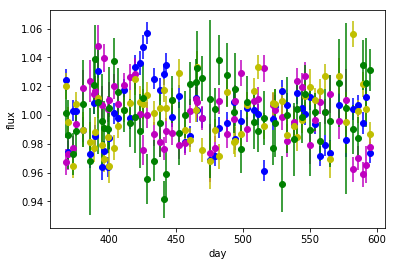

In [130]:
#function
data= readData('lens1lightcurve.dat')
seedata(data)

25.280000000000005
32.50285714285715
72.22857142857144
<built-in method mean of numpy.ndarray object at 0x000001C8CE6650D0>
<built-in method mean of numpy.ndarray object at 0x000001C8CE665710>
<built-in method mean of numpy.ndarray object at 0x000001C8CE6658A0>
<built-in method mean of numpy.ndarray object at 0x000001C8CE665990>


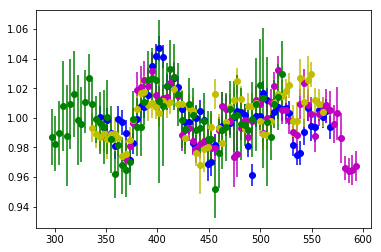

In [149]:
processdata(data, 4)

25.280000000000005
32.50285714285715
72.22857142857144
<built-in method mean of numpy.ndarray object at 0x000001C8CE7E2A30>
<built-in method mean of numpy.ndarray object at 0x000001C8CE7E2800>
<built-in method mean of numpy.ndarray object at 0x000001C8CE7E2710>
<built-in method mean of numpy.ndarray object at 0x000001C8CE7E2BC0>


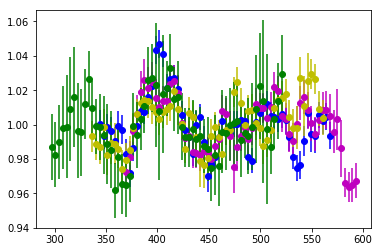

In [135]:
processdata(data,5)

25.280000000000005
32.50285714285715
72.22857142857144
<built-in method mean of numpy.ndarray object at 0x000001C8CE87E350>
<built-in method mean of numpy.ndarray object at 0x000001C8CE6EDDA0>
<built-in method mean of numpy.ndarray object at 0x000001C8CE6ED440>
<built-in method mean of numpy.ndarray object at 0x000001C8CE6ED800>


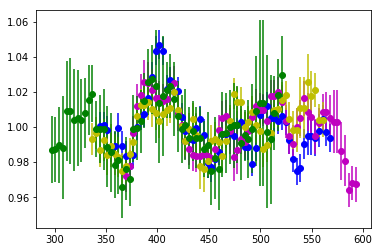

In [136]:
processdata(data, 6)

28.891428571428577
32.50285714285715
72.22857142857144
<built-in method mean of numpy.ndarray object at 0x000001C8CE84D210>
<built-in method mean of numpy.ndarray object at 0x000001C8CE84D6C0>
<built-in method mean of numpy.ndarray object at 0x000001C8CE84DCB0>
<built-in method mean of numpy.ndarray object at 0x000001C8CE8B0760>


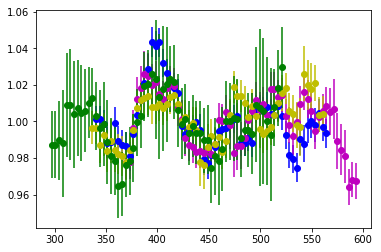

In [137]:
processdata(data, 7)

28.891428571428577
32.50285714285715
72.22857142857144
<built-in method mean of numpy.ndarray object at 0x000001C8CE4D6E40>
<built-in method mean of numpy.ndarray object at 0x000001C8CE4D6F80>
<built-in method mean of numpy.ndarray object at 0x000001C8CE4D6990>
<built-in method mean of numpy.ndarray object at 0x000001C8CE4D66C0>


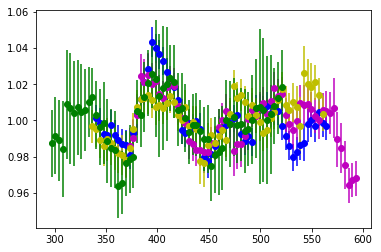

In [138]:
processdata(data, 8)

28.891428571428577
32.50285714285715
72.22857142857144
<built-in method mean of numpy.ndarray object at 0x000001C8CE4C9F80>
<built-in method mean of numpy.ndarray object at 0x000001C8CE718DA0>
<built-in method mean of numpy.ndarray object at 0x000001C8CE718DF0>
<built-in method mean of numpy.ndarray object at 0x000001C8CE7189E0>


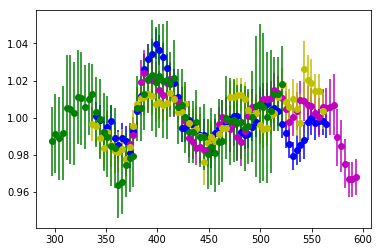

In [139]:
processdata(data, 9)

28.891428571428577
32.50285714285715
72.22857142857144
<built-in method mean of numpy.ndarray object at 0x000001C8CE676080>
<built-in method mean of numpy.ndarray object at 0x000001C8CE6765D0>
<built-in method mean of numpy.ndarray object at 0x000001C8CE676E90>
<built-in method mean of numpy.ndarray object at 0x000001C8CE6767B0>


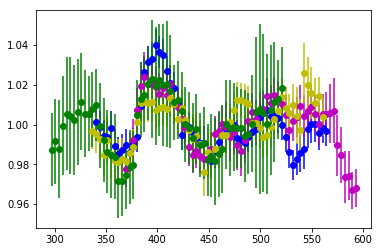

In [140]:
processdata(data, 10)

28.891428571428577
32.50285714285715
72.22857142857144
<built-in method mean of numpy.ndarray object at 0x000001C8CE6FF170>
<built-in method mean of numpy.ndarray object at 0x000001C8CFAB6D50>
<built-in method mean of numpy.ndarray object at 0x000001C8CFAB63A0>
<built-in method mean of numpy.ndarray object at 0x000001C8CFAB64E0>


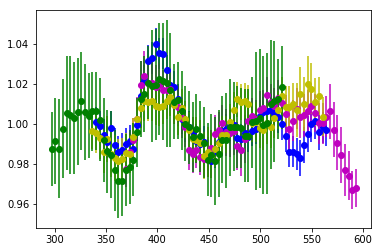

In [141]:
processdata(data, 11)

28.891428571428577
36.11428571428572
75.84000000000002
<built-in method mean of numpy.ndarray object at 0x000001C8CE778CB0>
<built-in method mean of numpy.ndarray object at 0x000001C8CE7973F0>
<built-in method mean of numpy.ndarray object at 0x000001C8CE797030>
<built-in method mean of numpy.ndarray object at 0x000001C8CE7978F0>


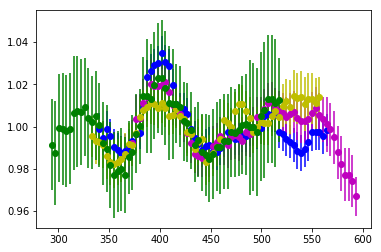

In [142]:
processdata(data, 12)

25.280000000000005
32.50285714285715
72.22857142857144
<built-in method mean of numpy.ndarray object at 0x000001C8CE59DB70>
<built-in method mean of numpy.ndarray object at 0x000001C8CE6BA8F0>
<built-in method mean of numpy.ndarray object at 0x000001C8CE8D70D0>
<built-in method mean of numpy.ndarray object at 0x000001C8CE8D7B20>


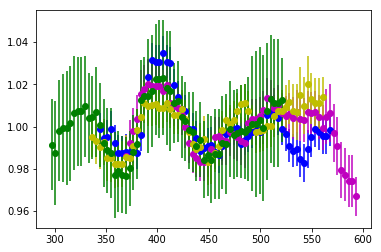

In [144]:
processdata(data, 13)

28.891428571428577
32.50285714285715
72.22857142857144
<built-in method mean of numpy.ndarray object at 0x000001C8CE64CC60>
<built-in method mean of numpy.ndarray object at 0x000001C8CE7E4940>
<built-in method mean of numpy.ndarray object at 0x000001C8CE71FB20>
<built-in method mean of numpy.ndarray object at 0x000001C8CE71FF30>


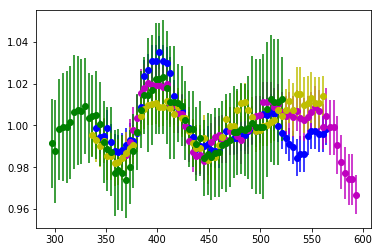

In [145]:
processdata(data, 14)

28.891428571428577
36.11428571428572
75.84000000000002
<built-in method mean of numpy.ndarray object at 0x000001C8CE953800>
<built-in method mean of numpy.ndarray object at 0x000001C8CE953A80>
<built-in method mean of numpy.ndarray object at 0x000001C8CE953530>
<built-in method mean of numpy.ndarray object at 0x000001C8CE9538F0>


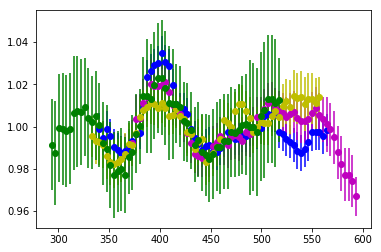

In [146]:
processdata(data, 15)

In [151]:
seedata('lens3lightcurve')

TypeError: string indices must be integers